<a href="https://colab.research.google.com/github/H0sseinR0stami/DeepLearningProjects/blob/main/Image_classification/Bee_with_pollen_detection/pollen_with_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

Model building

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

Preparing Data useing Data Generator

In [ ]:
def preprocessingImages_train(path):
  """
  input : path
  output: Pre processed images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path , target_size=(224,224), batch_size=32, class_mode='binary')
  return image


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/pollen_train_data/train"
train_data = preprocessingImages_train(path)

Found 489 images belonging to 2 classes.


In [ ]:
def preprocessingImages_test(path):
  """
  input : path
  output: Pre processed images
  """
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path , target_size=(224,224), batch_size=32, class_mode='binary')
  return image

In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/pollen_train_data/test"
test_data = preprocessingImages_test(path)

Found 96 images belonging to 2 classes.


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/pollen_train_data/validation"
val_data = preprocessingImages_test(path)

Found 96 images belonging to 2 classes.


In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model,load_model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
baseModel=VGG19(input_shape=(224,224,3),include_top=False)

In [ ]:
for layer in baseModel.layers:
  layer.trainable=False

In [ ]:
#baseModel.summary()
X=Flatten()(baseModel.output)
X=Dense(units=1,activation='sigmoid')(X)
model =Model(baseModel.input,X)

In [ ]:
#model.summary()
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab_Notebooks/Pollen_VGG.h5", monitor='val_accuracy',verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
cb=[mc,es]

In [ ]:
hist=model.fit_generator(train_data,epochs=20,validation_data=val_data, callbacks=cb)

Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 1.0810 - accuracy: 0.5072
Epoch 00001: val_accuracy improved from -inf to 0.47917, saving model to /content/drive/MyDrive/Colab_Notebooks/Pollen_VGG.h5
16/16 [==============================] - 27s 800ms/step - loss: 1.0810 - accuracy: 0.5072 - val_loss: 0.8194 - val_accuracy: 0.4792
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 0.5941 - accuracy: 0.6789
Epoch 00002: val_accuracy improved from 0.47917 to 0.83333, saving model to /content/drive/MyDrive/Colab_Notebooks/Pollen_VGG.h5
16/16 [==============================] - 10s 620ms/step - loss: 0.5941 - accuracy: 0.6789 - val_loss: 0.4263 - val_accuracy: 0.8333
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.7546
Epoch 00003: val_accuracy improved from 0.83333 to 0.87500, saving model to /content/drive/MyDrive/Colab_Notebooks/Pollen_VGG.h5
16/16 [==============================] - 10s 628ms/step - loss: 0.4728

In [ ]:
model = load_model("/content/drive/MyDrive/Colab_Notebooks/Pollen_VGG.h5")

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"Accuracy={100*acc}%")

Accuracy=91.66666865348816%


In [ ]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'acc vs val-acc')

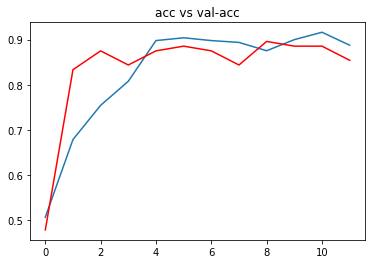

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c= 'red')

plt.title("acc vs val-acc")

Text(0.5, 1.0, 'acc vs val-acc')

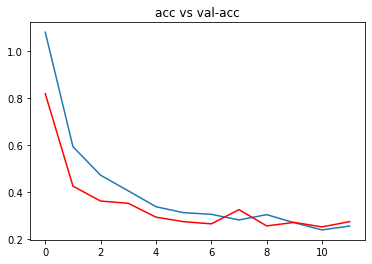

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c= 'red')

plt.title("acc vs val-acc")

Model accuracy

In [ ]:
from keras.preprocessing import image

In [ ]:
train_data.class_indices

{'not_pollen_carrying': 0, 'pollen_carrying': 1}

not_pollen_carrying


<function matplotlib.pyplot.show>

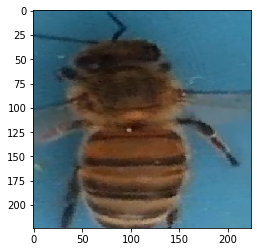

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/pollen_train_data/pollen_dataset/not_pollen_carrying/NP11139-148r.jpg'

img = image.load_img(path,target_size=(224,224))
i = image.img_to_array(img)/255
input_arr = np.expand_dims(i, axis = 0)
pred = (model.predict(input_arr)>0.5).astype("int32")[0][0]
if pred == 0:
  print("not_pollen_carrying")
else:
  print("pollen_carrying")

plt.imshow(input_arr[0])
plt.show


pollen_carrying


<function matplotlib.pyplot.show>

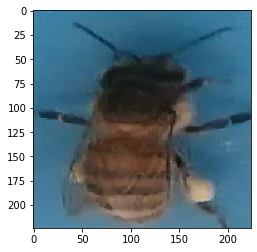

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/pollen_train_data/pollen_dataset/pollen_carrying/P53944-62r.jpg'

img = image.load_img(path,target_size=(224,224))
i = image.img_to_array(img)/255
input_arr = np.expand_dims(i, axis = 0)
pred = (model.predict(input_arr)>0.5).astype("int32")[0][0]
if pred == 0:
  print("not_pollen_carrying")
else:
  print("pollen_carrying")

plt.imshow(input_arr[0])
plt.show

